In [1]:
%matplotlib widget
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as ani
import numpy as np

In [2]:
ratingtmpdf = pd.read_csv(r'ml-100k\u.data',sep='\t',header=None,names = ['user_id', 'movie_id', 'rating' ,'timestamp' ] ,parse_dates = [3] )
ratingtmpdf['timestamp'] = pd.to_datetime(ratingtmpdf['timestamp'],unit='s')
ratingtmpdf.head()                                  

,user_id,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [3]:
movietmpdf=pd.read_csv(r'ml-100k\u.item',sep='|',header=None ,  encoding ="ISO 8859-1" )
movietmpdf.columns = [ 'id',  'movie_name',  'year' ,  'dummy',  'url',  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23]
movietmpdf.head()


,id,movie_name,year,dummy,url,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df =  pd.merge(ratingtmpdf , movietmpdf , left_on = 'movie_id', right_on = 'id')
df.head()

,user_id,movie_id,rating,timestamp,id,movie_name,year,dummy,url,5,...,14,15,16,17,18,19,20,21,22,23
0,196,242,3,1997-12-04 15:55:49,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,1997-10-01 23:06:30,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,1998-01-04 04:37:51,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,1997-11-10 05:03:55,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,1997-10-10 17:16:33,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['year'] = pd.to_datetime(df['year'] )
prep = pd.merge( df, df.groupby('movie_id').count().sort_values('id')[['id']], left_on='movie_id' , right_on='movie_id').sort_values('year')
prep.rename(columns={"id_y":"rating_count"}, inplace=True)

In [6]:
prep.head()
df = prep.groupby('movie_name').max().sort_values('year',ascending=True).iloc[:10]
df.head()


,user_id,movie_id,rating,timestamp,id_x,year,dummy,url,5,6,...,15,16,17,18,19,20,21,22,23,rating_count
movie_name,,,,,,,,,,,,,,,,,,,,,
"Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)",934,675,5,1998-04-18 17:25:21,675,1922-01-01,NaN,"http://us.imdb.com/M/title-exact?Nosferatu,%20...",0,0,...,0,1,0,0,0,0,0,0,0,54
"Scarlet Letter, The (1926)",495,1542,4,1998-02-28 03:47:23,1542,1926-01-01,NaN,http://us.imdb.com/M/title-exact?Scarlet%20Let...,0,0,...,0,0,0,0,0,0,0,0,0,2
"Blue Angel, The (Blaue Engel, Der) (1930)",934,617,5,1998-04-08 23:39:01,617,1930-01-01,NaN,http://us.imdb.com/M/title-exact?Blaue%20Engel...,0,0,...,0,0,0,0,0,0,0,0,0,18
M (1931),918,656,5,1998-04-22 17:19:28,656,1931-01-01,NaN,http://us.imdb.com/M/title-exact?M%20(1931),0,0,...,1,0,0,0,0,0,1,0,0,44
"Farewell to Arms, A (1932)",892,1124,4,1998-04-04 14:02:33,1124,1932-01-01,NaN,http://us.imdb.com/M/title-exact?Farewell%20to...,0,0,...,0,0,0,0,1,0,0,1,0,12


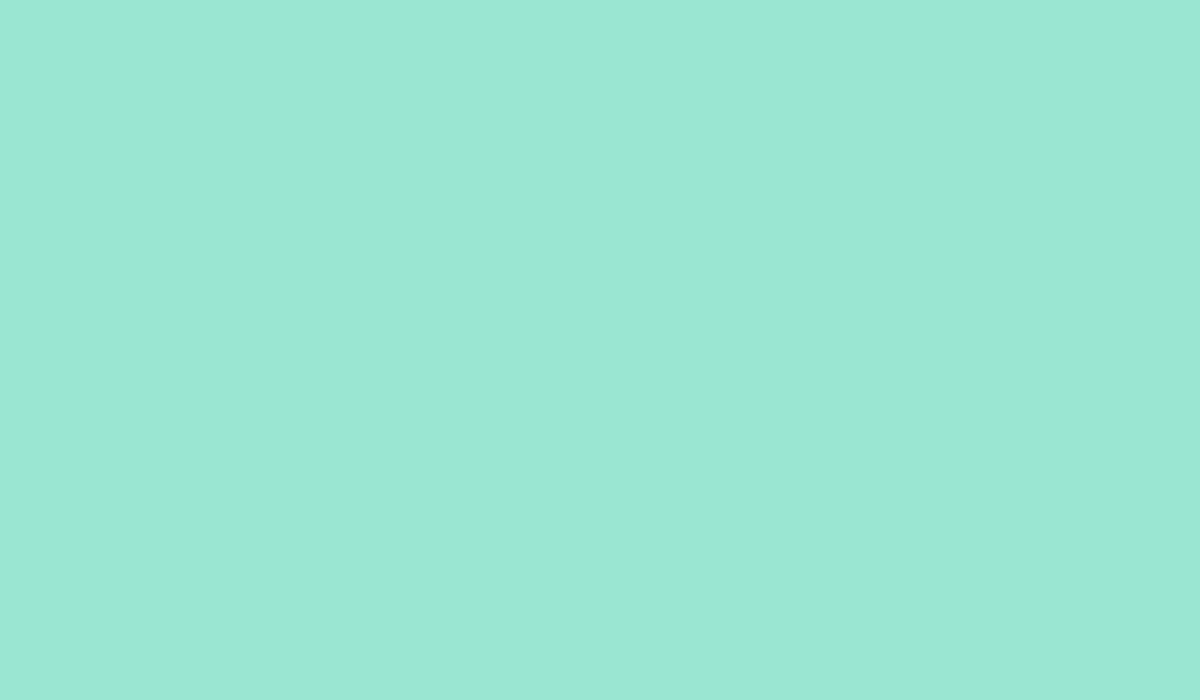

In [10]:
def buildmebarchart(i=int):
    #plt.legend(df1.columns)
    i=i*100
    df = prep.iloc[:i].groupby('movie_name').agg({'year':  'max' , 'rating' : 'sum'}).sort_values('rating',ascending=False)
    df['movie_name'] = df.index
    df.index = df['year']
    tmp=df[:5].pivot( columns='movie_name', values='rating')
    tmp.replace(np.nan, 0, inplace=True)
    outsidedf = df.copy()
    vyear =  " --  " + str(df.index.max().year)
    plt.title('Year' +  vyear  )
    p = plt.barh( tmp.columns ,  tmp.apply(lambda x : x.max()).to_numpy())

    
    #ax.barh(df.index[:10] ,df['rating_count'][:10] ,color='#f3bce7' )
#df = df.groupby('movie_name').mean().sort_values('rating_count',ascending=False).iloc[:10]
#df[(df['rating_count'] < 500) &  (df['rating_count'] > 200 )]

fig = plt.figure(figsize=(12, 7),constrained_layout=True)
fig.set_facecolor("#9ae6d2")
outsidedf = pd.DataFrame()
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
# df = prep.iloc[:1000].groupby('movie_name').agg({'year':  'max' , 'rating' : 'sum'}).sort_values('rating',ascending=False)
# df['movie_name'] = df.index
# df.index = df['year']

# tmp=df[:5].pivot( columns='movie_name', values='rating')
# tmp.replace(np.nan, 0, inplace=True)
# p = plt.scatter(tmp.apply(lambda x : x.max()).to_numpy() ,tmp.columns)
# Yr = 'Year ' + tmp.index.max().strftime('%Y')
# plt.title(Yr)
plt.show()


In [8]:
# fig, ax = plt.subplots(figsize=(12, 7),constrained_layout=True)
# fig.set_facecolor("#9ae6d2")
# #ax1=fig.add_subplot(111)
# ax.barh(df.index ,df['rating_count'] ,color='#f3bce7' )
# ax.set_xlabel("No of pepole rated")
# ax.invert_yaxis()
# ax2=ax.twiny()
# ax2.scatter(x=df['rating'],y=df.index , s=60 , color= '#bb99e0')
# ax2.set_xlabel("Avg Rating")

# plt.show()

In [11]:
outsidedf


""
